# EDA
>fuente: Airbnd New York


In [144]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler, LabelEncoder, OneHotEncoder
import pickle

## Planteamiento del problema

### Queremos predecir los precios de un alojamiento de airbnb en Nueva York a traves de una base de datos que ya tenemos

## Recopilación de datos

In [145]:
df = pd.read_csv('/workspaces/adamcn10-intro-ml/data/raw/AB_NYC_2019.csv')
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


## Analisis Descriptivo

>Forma de los datos

In [146]:
df.shape

(48895, 16)

In [147]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

##### Observaciones - Conclusiones
>- El DataFrame consta de 48895 entradas y estas corresponden cada una a un alojamiento y 16 columnas que son las caracteristicas que tenemos de estos
>- La mayoría de las caracteristicas analizadas estan practicamente completas en todas las casas escepto la ultima review o las reviews por mes, esto se puede deber a un error o a viviendas que no han sido reseñadas aún
>- El nombre y el nombre del propietario son los unicos datos además de los mencionados que no están completos, igualmente estos datos se podrian considerar irrelevantes ya que los tenemos también por id y host_id
>- Los datos constan de 10 caracteristicas númericas y 6 caregóricas pero de las numericas, id y host_id más que darnos un valor númerico nos da un identificador de los alojamientos y los propietarios.

In [148]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,48895.0,1.901714e+07,1.098311e+07,2539.00000,9.471945e+06,1.967728e+07,2.915218e+07,3.648724e+07
host_id,48895.0,6.762001e+07,7.861097e+07,2438.00000,7.822033e+06,3.079382e+07,1.074344e+08,2.743213e+08
latitude,48895.0,4.072895e+01,5.453008e-02,40.49979,4.069010e+01,4.072307e+01,4.076311e+01,4.091306e+01
longitude,48895.0,-7.395217e+01,4.615674e-02,-74.24442,-7.398307e+01,-7.395568e+01,-7.393627e+01,-7.371299e+01
price,48895.0,1.527207e+02,2.401542e+02,0.00000,6.900000e+01,1.060000e+02,1.750000e+02,1.000000e+04
minimum_nights,48895.0,7.029962e+00,2.051055e+01,1.00000,1.000000e+00,3.000000e+00,5.000000e+00,1.250000e+03
number_of_reviews,48895.0,2.327447e+01,4.455058e+01,0.00000,1.000000e+00,5.000000e+00,2.400000e+01,6.290000e+02
reviews_per_month,38843.0,1.373221e+00,1.680442e+00,0.01000,1.900000e-01,7.200000e-01,2.020000e+00,5.850000e+01
calculated_host_listings_count,48895.0,7.143982e+00,3.295252e+01,1.00000,1.000000e+00,1.000000e+00,2.000000e+00,3.270000e+02
availability_365,48895.0,1.127813e+02,1.316223e+02,0.00000,0.000000e+00,4.500000e+01,2.270000e+02,3.650000e+02


>Vemos cuantos valores unicos hay por cada caracteristica

In [149]:
df.nunique()

id                                48895
name                              47905
host_id                           37457
host_name                         11452
neighbourhood_group                   5
neighbourhood                       221
latitude                          19048
longitude                         14718
room_type                             3
price                               674
minimum_nights                      109
number_of_reviews                   394
last_review                        1764
reviews_per_month                   937
calculated_host_listings_count       47
availability_365                    366
dtype: int64

## Limpieza de datos

>No es necesario eliminar posibles alojamientos duplicados por id con drop ya que al ver elementos unicos de cada caracteristica vemos que id tiene 48895 elementos que son la cantidad de filas del DataFrame

### Eliminamos información irrelevante

> Si queremos poder predecir los precios hay informaciones que nos son irrelevantes:
>- name y host_name son irrelevantes ya que estas son incompletas y tenemos id y host_id que estan relacionadas con estas y estan completas en los datos.
>- last_review y reviews_per_month tampoco pienso que sean relevantes respecto al precio y son los otros dateos que estan incompletos, por lo tanto podemos prescindir de ellos.
>- En cuanto a los datos que tenemos completos, viendo también la cantidad de elementos únicos que tenemos de cada uno, pienso que podriamos prescindir de id porque no nos da ningunainformación relevante ya que es diferente para cada uno y host_id ya que al agrupar por dueño y haber tantos dueños diferentes y no ser algo lineal sinó más bien discreto no pienso que sea algo reelevante

In [ ]:
df.drop(["id", "name", "host_id", "host_name", "last_review", "reviews_per_month"], 
        axis=1, inplace=True)
df

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
0,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,6,365
1,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2,355
2,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,1,365
3,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,1,194
4,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,1,0
...,...,...,...,...,...,...,...,...,...,...
48890,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,2,9
48891,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,2,36
48892,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,1,27
48893,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,6,2


## Analisis de variables

### Analisis de variable univariable

#### Analisis univariable de variables categoricas

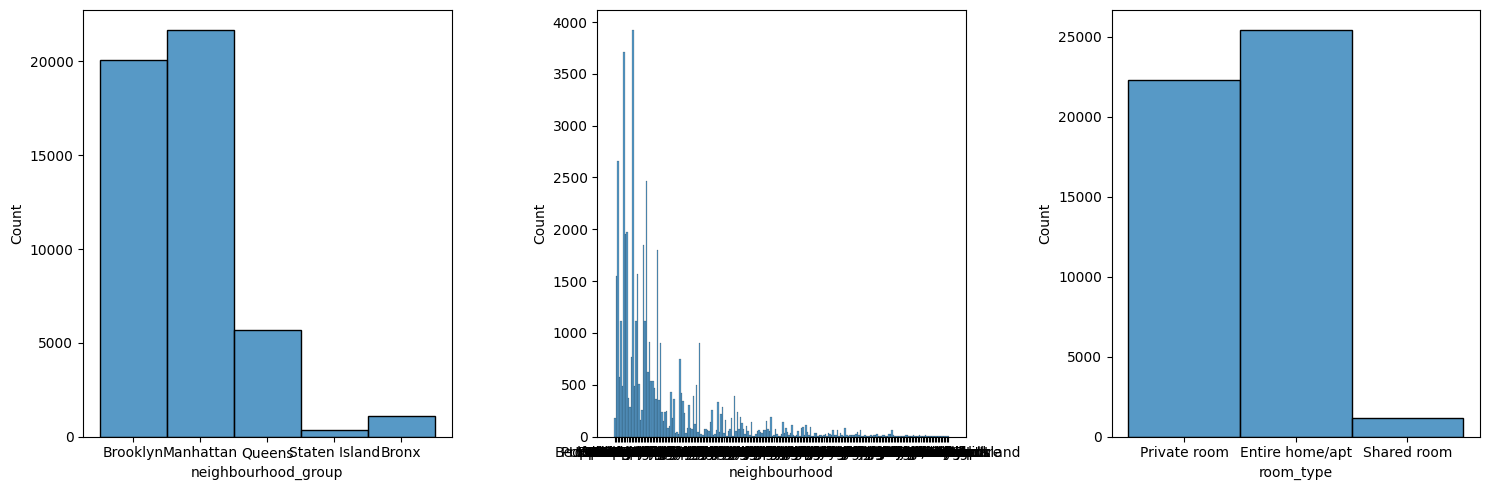

In [151]:
fig, axs = plt.subplots(1, 3, figsize=(15,5))
sns.histplot(ax=axs[0], data=df, x="neighbourhood_group")
sns.histplot(ax=axs[1], data=df, x="neighbourhood")
sns.histplot(ax=axs[2], data=df, x="room_type")
plt.tight_layout()
plt.show()

##### Observaciones - Conclusiones
>- Vemos que la mayoría de los alojamientos se encuentran en Brooklyn y Manhattan, y despues se distribuyen los restantes en Queens, unos pocos en el Bronx y una minima cantidad en Staten Island
>- En cuanto a barrios en si, vemos una concentración en un número pequeño de barrios pero después una pequeña cantidad de alojamientos en muchos otros barrios.
>- Respectp a los tipos de habitación más habituales vemos la habitación privada o e apartamento o casa completa, para ver también una minima cantidad de habitaciones compartidas.

#### Analisis univariable de variables numericas

<function matplotlib.pyplot.show(close=None, block=None)>

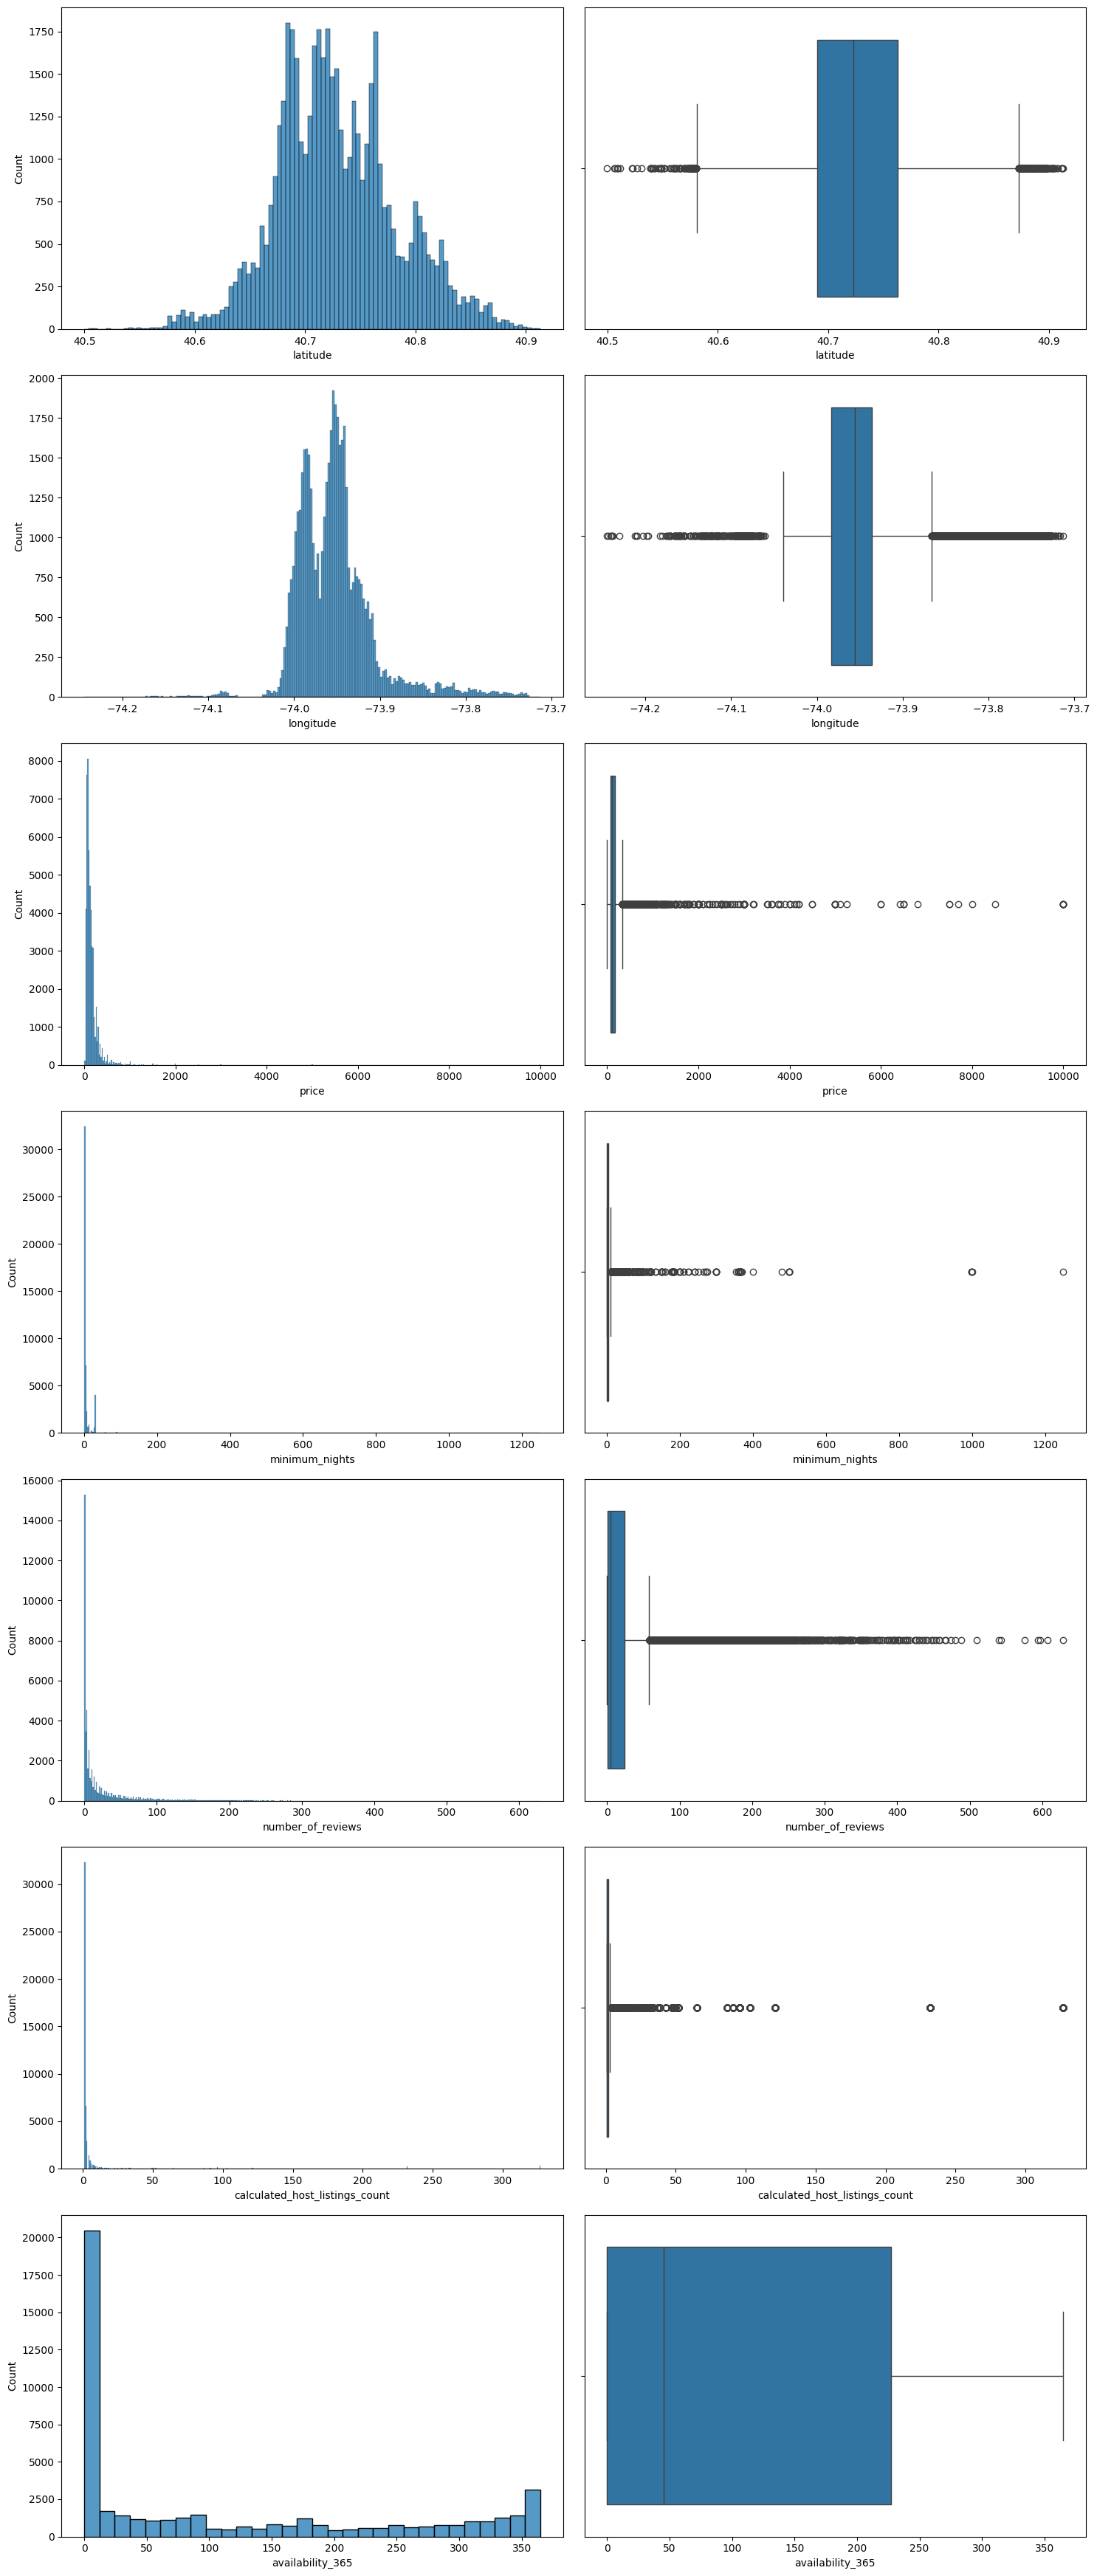

In [152]:
fig, axis = plt.subplots(7, 2, figsize=(15, 35))
sns.histplot(ax=axis[0, 0], data=df, x="latitude")
sns.boxplot(ax=axis[0, 1], data=df, x="latitude")
sns.histplot(ax=axis[1, 0], data=df, x="longitude")
sns.boxplot(ax=axis[1, 1], data=df, x="longitude")
sns.histplot(ax=axis[2, 0], data=df, x="price")
sns.boxplot(ax=axis[2, 1], data=df, x="price")
sns.histplot(ax=axis[3, 0], data=df, x="minimum_nights")
sns.boxplot(ax=axis[3, 1], data=df, x="minimum_nights")
sns.histplot(ax=axis[4, 0], data=df, x="number_of_reviews")
sns.boxplot(ax=axis[4, 1], data=df, x="number_of_reviews")
sns.histplot(ax=axis[5, 0], data=df, x="calculated_host_listings_count")
sns.boxplot(ax=axis[5, 1], data=df, x="calculated_host_listings_count")
sns.histplot(ax=axis[6, 0], data=df, x="availability_365")
sns.boxplot(ax=axis[6, 1], data=df, x="availability_365")
plt.tight_layout()
plt.show


##### Observaciones - Conclusiones
>- A escepción de la disponibilidad, todas las caracteristicas tienen valores atipicos por lo que se ve en los Boxplot.
>- latitud y longitud son las que muestran una forma más simetrica sin llegar a serlo, el resto de datos parecen agruparse a laizquierda con más o menos valores puntuales extremos en valores altos.

### Analisis de Variable Multivariable

#### Analisis numérico-numérico

>Vemos las relaciones con la variable precio porque esta es la variable objetivo y por tanto la que queremos poder intentar predecir.

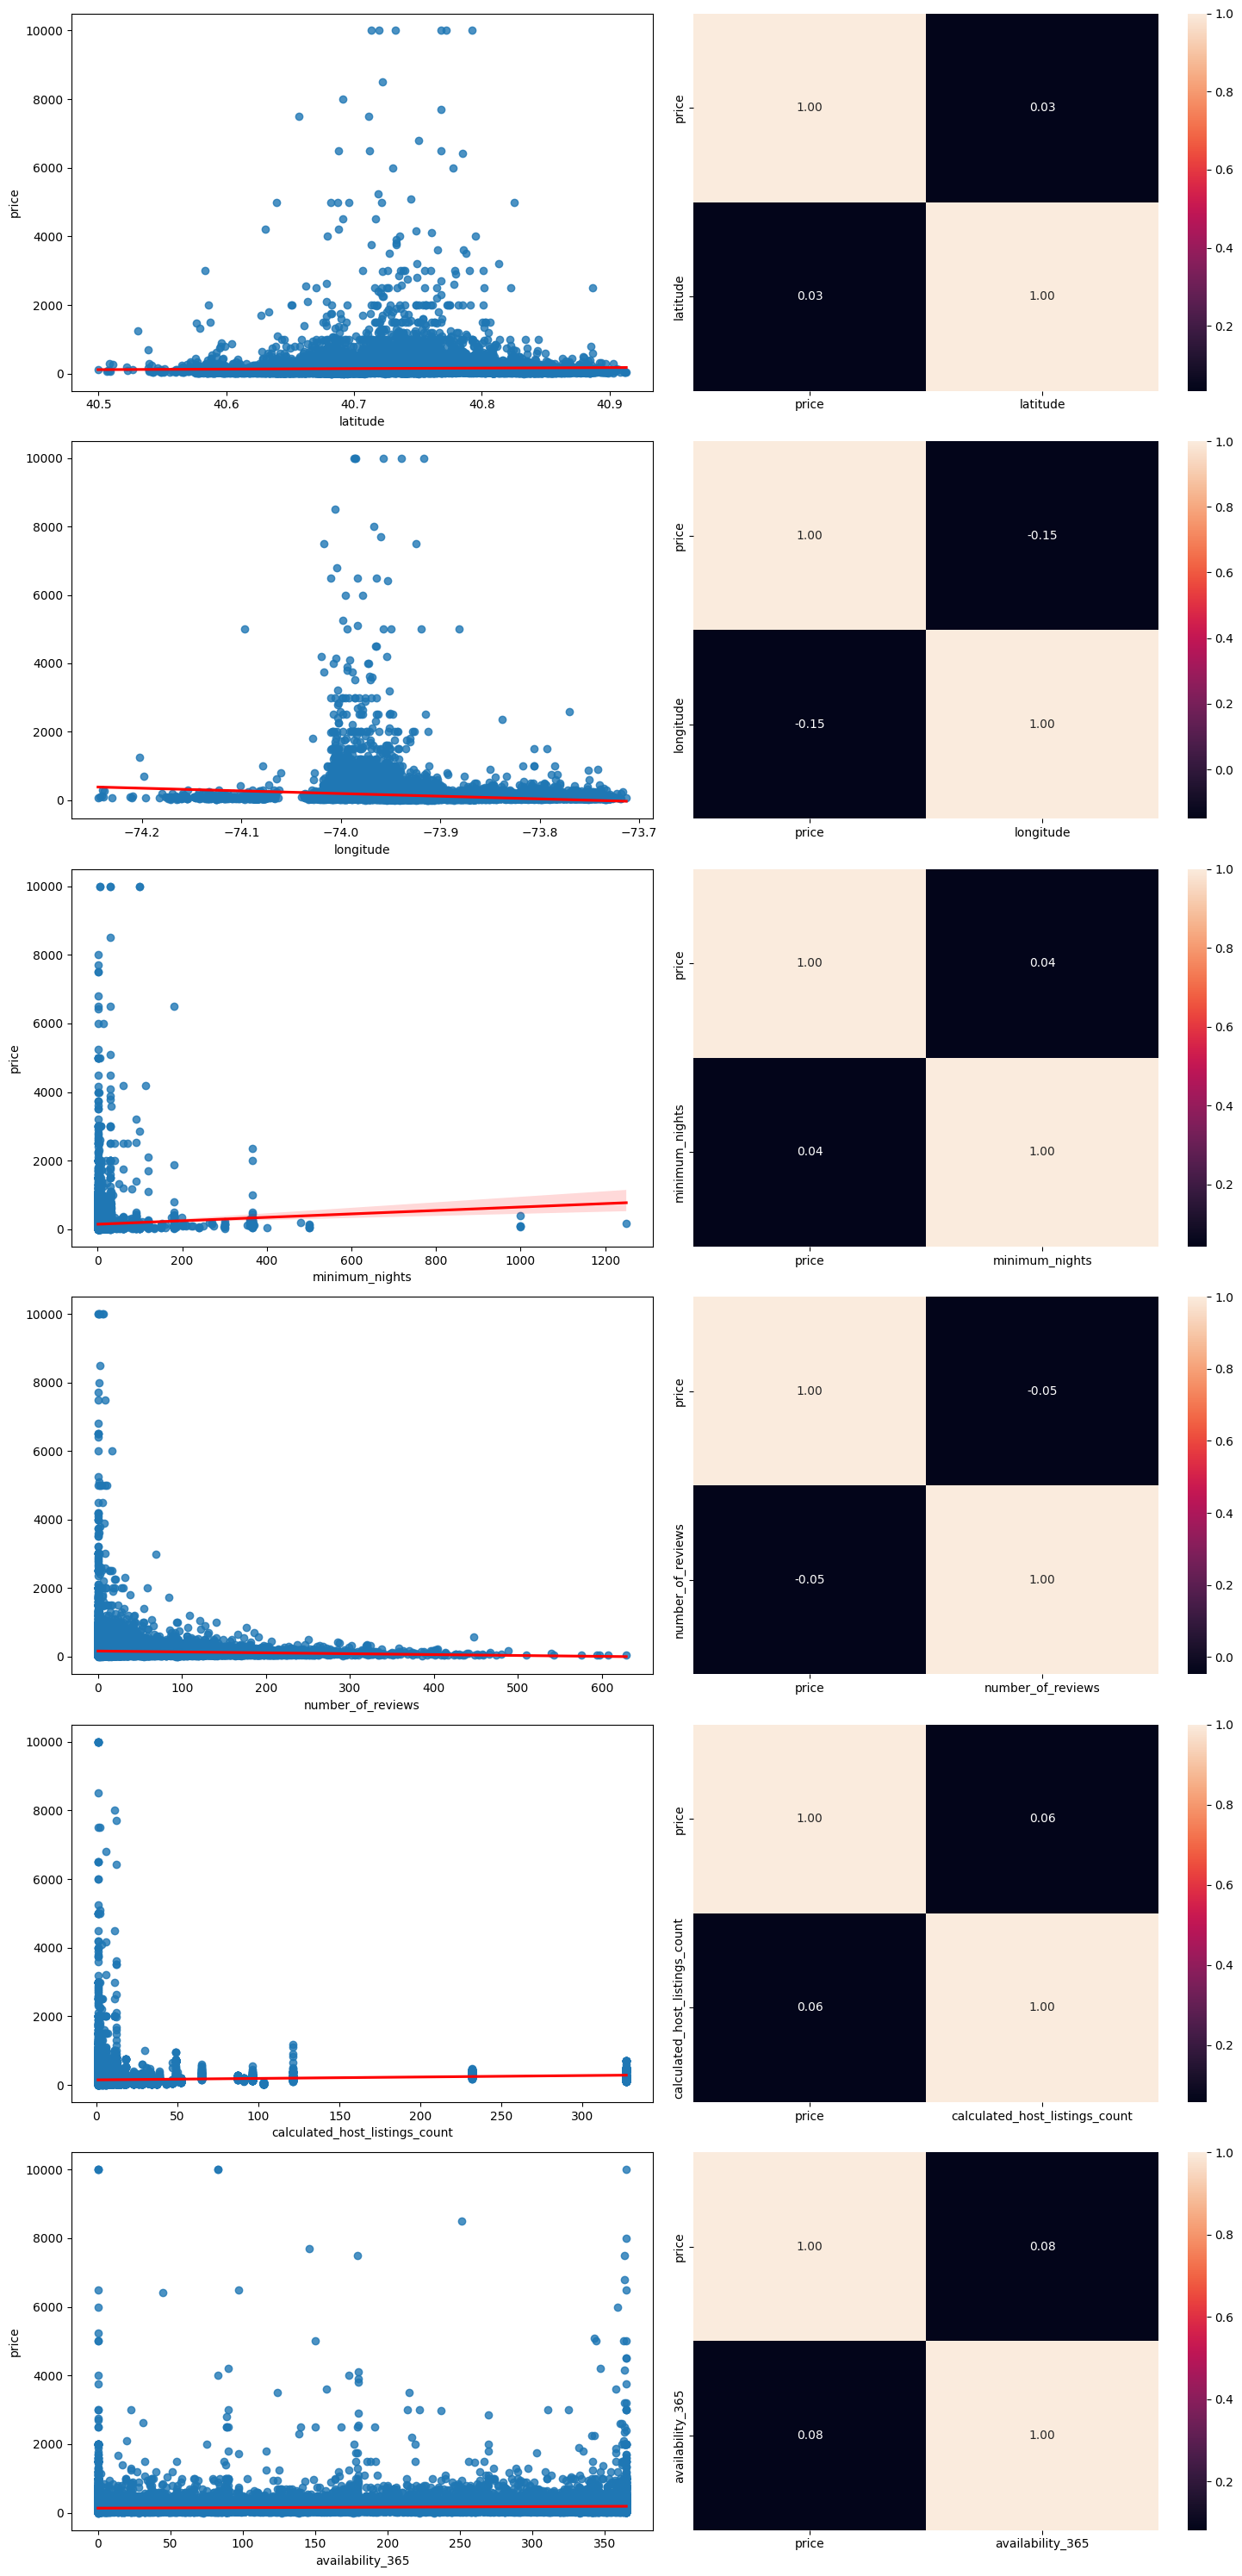

In [ ]:
corr_price_latitude = df[["price", "latitude"]].corr()
corr_price_longitude = df[["price", "longitude"]].corr()
corr_price_minimum_nights = df[["price", "minimum_nights"]].corr()
corr_price_number_of_reviews = df[["price", "number_of_reviews"]].corr()
corr_price_calculated_host_listings_count = df[["price", "calculated_host_listings_count"]].corr()
corr_price_availability_365 = df[["price", "availability_365"]].corr()

fig, axis = plt.subplots(6, 2, figsize=(15, 30))

sns.regplot(ax=axis[0, 0], data=df, x="latitude", y="price", line_kws={'color': 'red'})
sns.heatmap(ax=axis[0, 1], data=corr_price_latitude, annot=True, fmt=".2f")
sns.regplot(ax=axis[1, 0], data=df, x="longitude", y="price", line_kws={'color': 'red'}).set(ylabel=None)
sns.heatmap(ax=axis[1, 1], data=corr_price_longitude, annot=True, fmt=".2f")
sns.regplot(ax=axis[2, 0], data=df, x="minimum_nights", y="price", line_kws={'color': 'red'})
sns.heatmap(ax=axis[2, 1], data=corr_price_minimum_nights, annot=True, fmt=".2f")
sns.regplot(ax=axis[3, 0], data=df, x="number_of_reviews", y="price", 
            line_kws={'color': 'red'}).set(ylabel=None)
sns.heatmap(ax=axis[3, 1], data=corr_price_number_of_reviews, annot=True, fmt=".2f")
sns.regplot(ax=axis[4, 0], data=df, x="calculated_host_listings_count", y="price", 
            line_kws={'color': 'red'}).set(ylabel=None)
sns.heatmap(ax=axis[4, 1], data=corr_price_calculated_host_listings_count, annot=True, fmt=".2f")
sns.regplot(ax=axis[5, 0], data=df, x="availability_365", y="price", line_kws={'color': 'red'})
sns.heatmap(ax=axis[5, 1], data=corr_price_availability_365, annot=True, fmt=".2f")


plt.tight_layout()
plt.show()

##### Observaciones - Conclusiones
>- A priori no parece que haya ningun factor de que de manera independiente esté relacionada con el precio de los alojamientos.
>- El factor que vemos que mayor relación de manera individual es la longitud y siendo esta una relacion lineal negativa, aunque muy muy leve.

#### Análisis Categórico - Categórico

>Vemos las relaciones con la variable precio porque esta es la variable objetivo y por tanto la que queremos poder intentar predecir.

>Como el precio es una variable lineal y no categorica la haremos funcionar como esta agrupandola por los tres primeros cuartiles, el cuarto respecto al boxplot con la función Q3 + 1.5 IQR donde el IQR es la diferencia entre el valor del primer cuartil y el tercero, dejando una quinta categoría para los Outliers. (Obtendremos los tres primeros cuartiles de la tabla anteriormente hecha con df.describe().T). Lo haremos creando la categoria price_categorized gracias a la funcion de pandas cut.

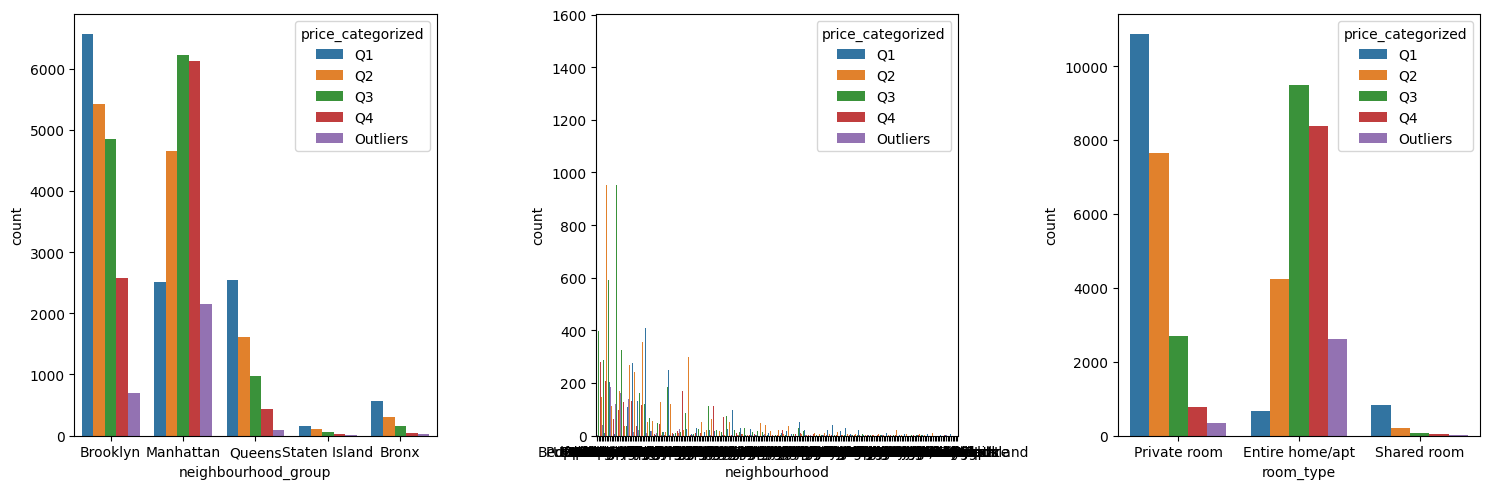

In [ ]:
df['price_categorized'] = pd.cut(df['price'], bins=[0, 69, 106, 175, 334, df['price'].max()], 
                                 labels=['Q1', 'Q2', 'Q3', 'Q4', 'Outliers'])

fig, axs = plt.subplots(1, 3, figsize=(15,5))
sns.countplot(ax=axs[0], data=df, x="neighbourhood_group", hue='price_categorized')
sns.countplot(ax=axs[1], data=df, x="neighbourhood", hue='price_categorized')
sns.countplot(ax=axs[2], data=df, x="room_type", hue='price_categorized')
plt.tight_layout()
plt.show()

df.drop('price_categorized', axis=1, inplace=True)

##### Observaciones - Conclusiones
>- Podemos ver que en Manhattan los precios tienden a ser más caros que en el resto de agrupaciones de barrios, que siguen una distribución donde hay más de los más baratos y mientras sube el precio hay menos.
>- Segun los barrios no podemos sacar demasiadas conculsiones ya que al haber tantos no se ve demasiado.
>- Respecto a los tipos de habitación vemos que que tanto las habitaciones privadas como las compartidas van decreciendo en cantidad en cuanto el precio sube, pero los apartamentos o casas enteras tienden a ser más caras.

#### Análisis de correlaciones

>Creamos columnas númericas para las categoricas

In [155]:
df["neighbourhood_group_n"] = pd.factorize(df["neighbourhood_group"])[0]
df["neighbourhood_n"] = pd.factorize(df["neighbourhood"])[0]
df["room_type_n"] = pd.factorize(df["room_type"])[0]

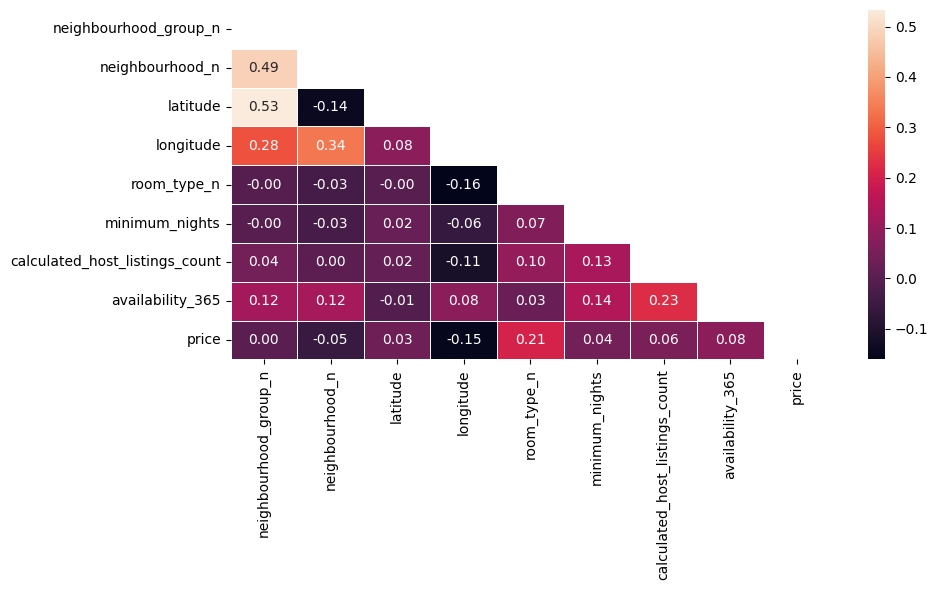

In [156]:
corr = df[['neighbourhood_group_n', 'neighbourhood_n', 
           'latitude', 'longitude', 'room_type_n', 
           'minimum_nights', 'calculated_host_listings_count',
            'availability_365', 'price']].corr()

mask = np.triu(np.ones_like(corr, dtype=bool))

fig, axis = plt.subplots(figsize=(10, 6))
sns.heatmap(corr, mask=mask, annot=True, linewidths=0.5, fmt=".2f")

plt.tight_layout()
plt.show()

##### Observaciones - Conclusiones
>- Ahora vemos que más que la pequeña posible correlacion con la longitud que hemos visto antes, se ve mas claramente que con la longitud, una posible correlación aunque leve con el tipo de habitación
>- Mas allá de eso no vemos ninguna posible correlación con la variable objetivo, precio.

## Ingeniería de Características

### Outliers

In [157]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
latitude,48895.0,40.728949,0.054530,40.49979,40.69010,40.72307,40.763115,40.91306
longitude,48895.0,-73.952170,0.046157,-74.24442,-73.98307,-73.95568,-73.936275,-73.71299
price,48895.0,152.720687,240.154170,0.00000,69.00000,106.00000,175.000000,10000.00000
minimum_nights,48895.0,7.029962,20.510550,1.00000,1.00000,3.00000,5.000000,1250.00000
number_of_reviews,48895.0,23.274466,44.550582,0.00000,1.00000,5.00000,24.000000,629.00000
calculated_host_listings_count,48895.0,7.143982,32.952519,1.00000,1.00000,1.00000,2.000000,327.00000
availability_365,48895.0,112.781327,131.622289,0.00000,0.00000,45.00000,227.000000,365.00000
neighbourhood_group_n,48895.0,0.786911,0.844386,0.00000,0.00000,1.00000,1.000000,4.00000
neighbourhood_n,48895.0,29.888782,34.676634,0.00000,7.50000,19.00000,37.000000,220.00000
room_type_n,48895.0,0.567113,0.541249,0.00000,0.00000,1.00000,1.000000,2.00000


##### Observaciones - Conclusiones
>Vemos en las columnas 'price', 'minimum_nights', 'number_of_reviews', 'calculated_host_listings_count' valores muy dispares entre sus medias y sus medianas (percentil 50) y sus máximos valores, en los tres casos vemos una media sorprendentemente por encima de su mediana y un valor máximo muy alejado de estas.


#### Tambien utilizamos boxplots para visualizar outliers

<function matplotlib.pyplot.show(close=None, block=None)>

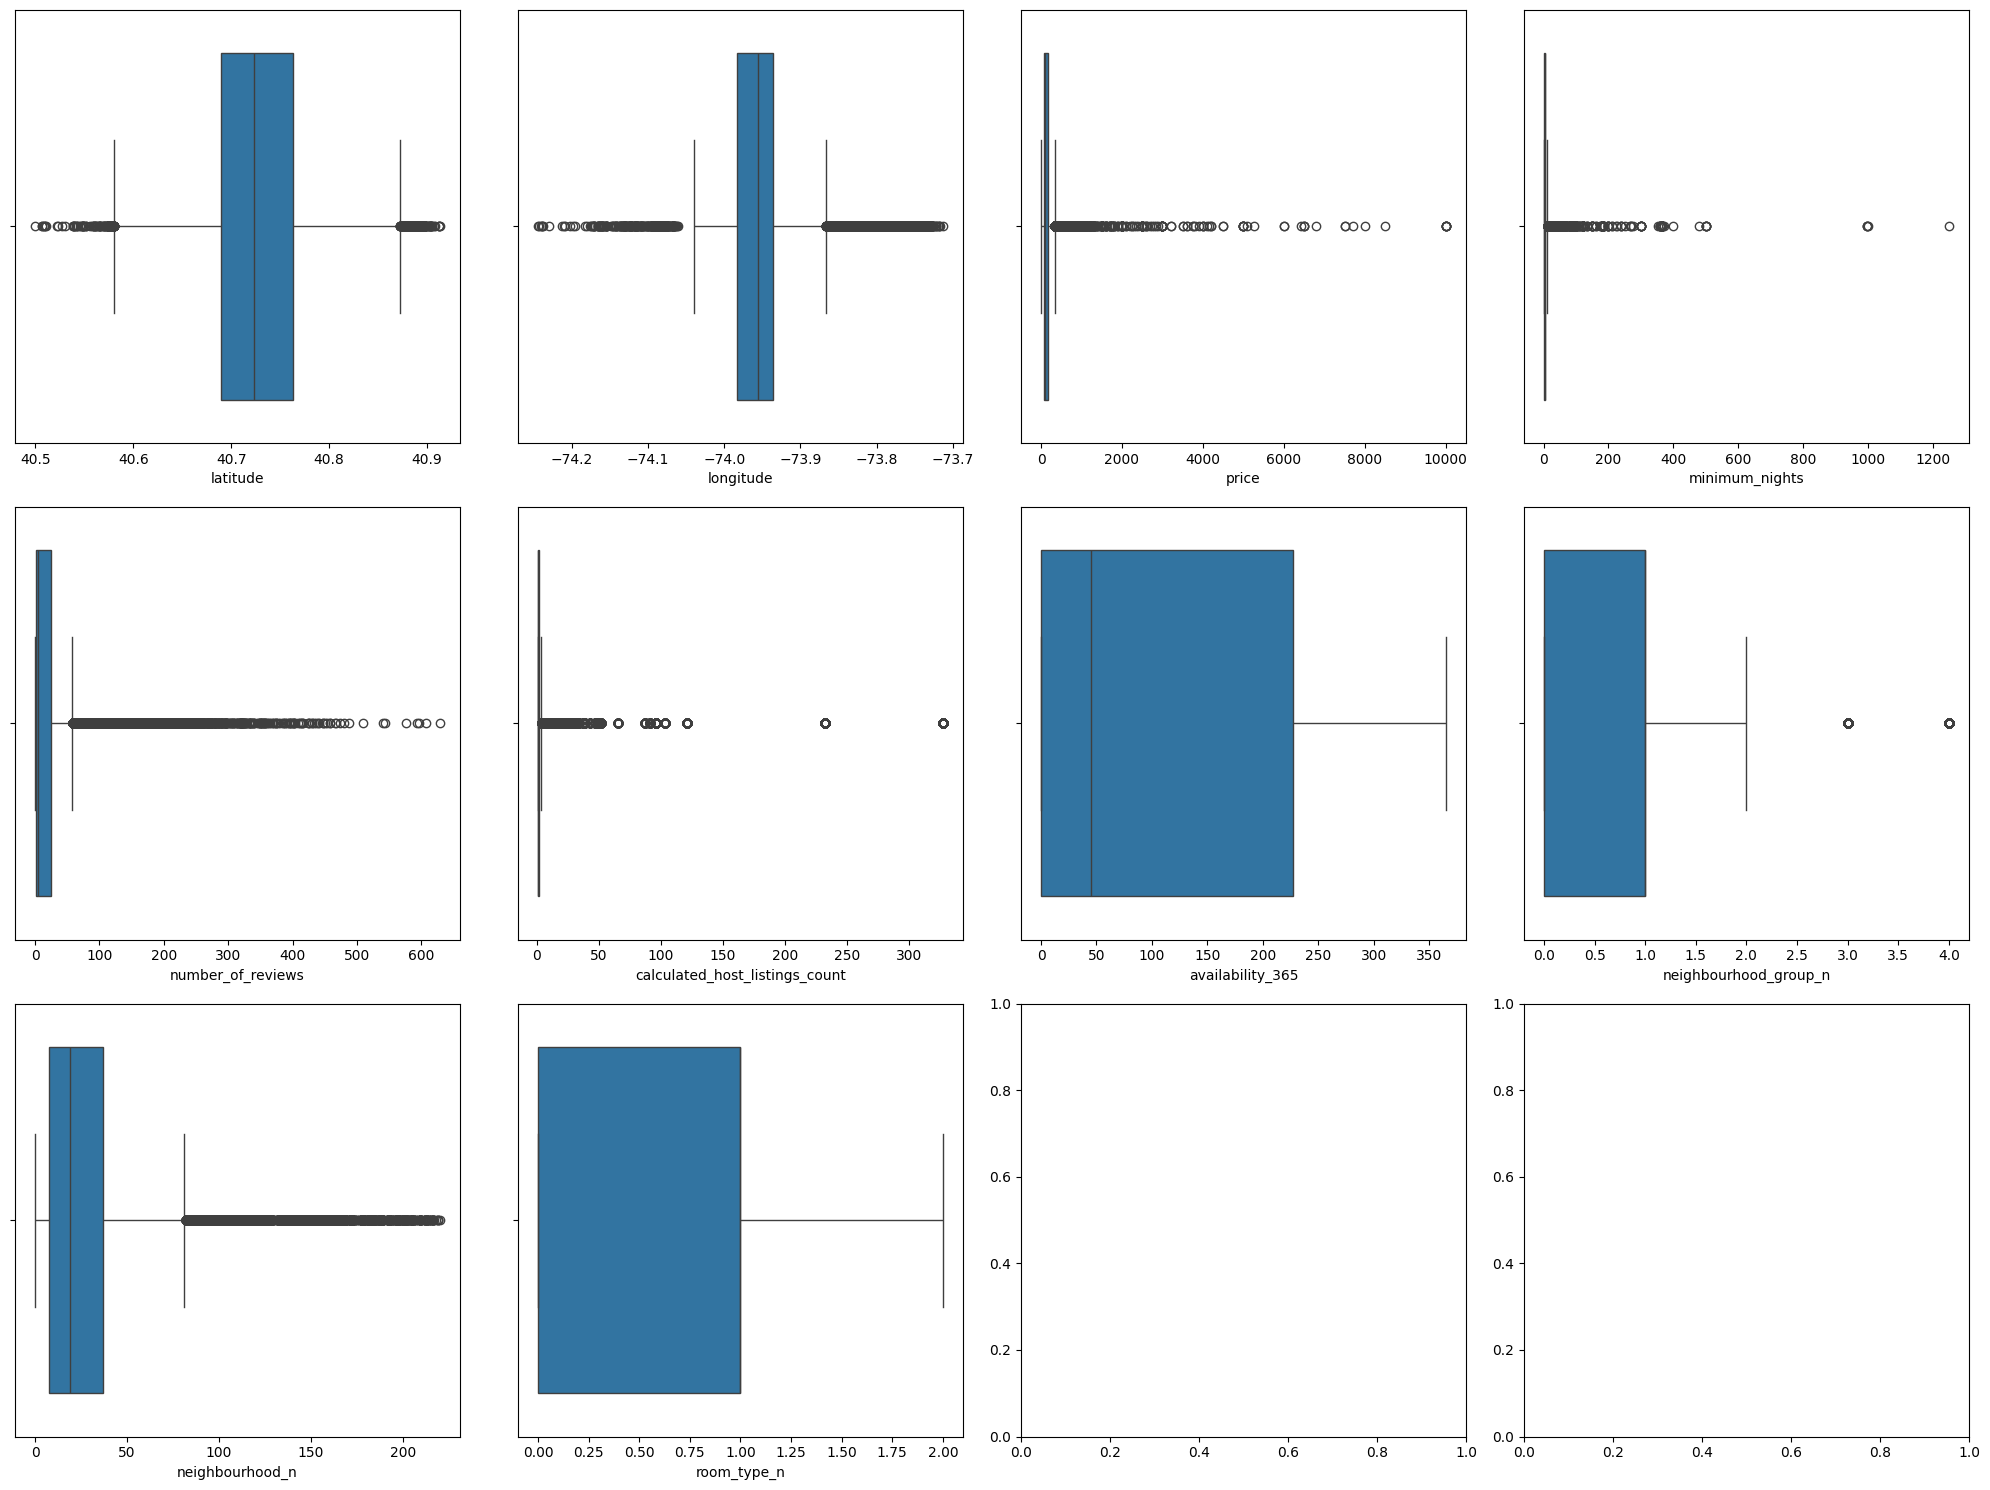

In [158]:
fig, axis = plt.subplots(3, 4, figsize=(20, 15))
sns.boxplot(ax=axis[0, 0], data=df, x="latitude")
sns.boxplot(ax=axis[0, 1], data=df, x="longitude")
sns.boxplot(ax=axis[0, 2], data=df, x="price")
sns.boxplot(ax=axis[0, 3], data=df, x="minimum_nights")
sns.boxplot(ax=axis[1, 0], data=df, x="number_of_reviews")
sns.boxplot(ax=axis[1, 1], data=df, x="calculated_host_listings_count")
sns.boxplot(ax=axis[1, 2], data=df, x="availability_365")
sns.boxplot(ax=axis[1, 3], data=df, x="neighbourhood_group_n")
sns.boxplot(ax=axis[2, 0], data=df, x="neighbourhood_n")
sns.boxplot(ax=axis[2, 1], data=df, x="room_type_n")
plt.tight_layout()
plt.show

##### Observaciones - Conclusiones
>Vemos que todos los valores escepto 'availability_365' y 'room_type_n' tienen Outliers, en el caso de 'latitude' y 'longitude' hay outliers por los dos lados, pero en el resto solo por la derecha.

>En 'price' vemos muchos utliers juntos pero alguno más suelto por la derecha, aunque hay muchos outliers como para poder acotar la funcion, en 'minimum_nights', 'calculated_host_listings_count' y 'neighbourhood_group_n' si que encontramos valores poco comunes separados que podriamos llegar a considerar o no un valor atípico.

### Faltantes

In [159]:
df.isnull().sum() / df.shape[0]

neighbourhood_group               0.0
neighbourhood                     0.0
latitude                          0.0
longitude                         0.0
room_type                         0.0
price                             0.0
minimum_nights                    0.0
number_of_reviews                 0.0
calculated_host_listings_count    0.0
availability_365                  0.0
neighbourhood_group_n             0.0
neighbourhood_n                   0.0
room_type_n                       0.0
dtype: float64

In [160]:
df.isnull().sum().sort_values(ascending=False)

neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
calculated_host_listings_count    0
availability_365                  0
neighbourhood_group_n             0
neighbourhood_n                   0
room_type_n                       0
dtype: int64

##### Observaciones - Conclusiones
>Como se puede ver no hay ningun valor faltante en los que quedan en el DataFrame, por lo que no hay que solucionar nada.

### Inferencia de nuevas características

##### Observaciones - Conclusiones
> Del analisis de los datos, podemos agrupar por ejemplo los valores de latitud y longitud por un valor de coordenadas siendo este una dupla, pero al ser una dupla no sería muy util para trabajar con ello por lo que no se va a hacer. No veo ningun otro valor que pueda ser juntado con ningun otro.

In [161]:
#df['coordinates'] = df.apply(lambda row: (row['latitude'], row['longitude']), axis=1)


## Split

>Veo la forma del dataframe

In [162]:
df.shape

(48895, 13)

>Hago el split con 'price' como variable objetivo

In [163]:
X = df.drop("price", axis=1)
y = df["price"]

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=25)


## Scaling & Encoding

>Hago encoding antes del scalong porque tengo una variable categórica con 221 valores distintos y tendría que volver a escalar.

### Encoding

>Voy a hacerlo de manera mixta ya que no considero que el orden tenga importancia en las variables categoricas que tenemos, pero hay una de las variables que tiene demasiadas opciones como para usar one hot encoding y por ello para 'neighbourhood' utilizaré label encoding

In [164]:
label_encoder = LabelEncoder()
onehot_encoder = OneHotEncoder(sparse_output=False)

onehot_categories = ['neighbourhood_group', 'room_type']
label_categories = ['neighbourhood']

X_train_final = X_train.copy()
X_test_final = X_test.copy()

label_encoder.fit(df['neighbourhood'])
X_train_final['neighbourhood_encoded'] = label_encoder.transform(X_train['neighbourhood'])
X_test_final['neighbourhood_encoded'] = label_encoder.transform(X_test['neighbourhood'])

onehot_encoder.fit(X_train[onehot_categories])

X_train_ohe = onehot_encoder.transform(X_train[onehot_categories])
X_train_ohe_df = pd.DataFrame(X_train_ohe,
                              index=X_train.index,
                              columns=onehot_encoder.get_feature_names_out(onehot_categories))

X_test_ohe = onehot_encoder.transform(X_test[onehot_categories])
X_test_ohe_df = pd.DataFrame(X_test_ohe,
                             index=X_test.index,
                             columns=onehot_encoder.get_feature_names_out(onehot_categories))

X_train_final = pd.concat([X_train_final, X_train_ohe_df], axis=1)
X_test_final = pd.concat([X_test_final, X_test_ohe_df], axis=1)

X_train_final.drop(['neighbourhood_group', 'neighbourhood', 'room_type', 'neighbourhood_group_Staten Island', 
                    'room_type_Shared room', 'neighbourhood_group_n', 'neighbourhood_n', 'room_type_n'], 
                   axis=1, inplace=True)
X_test_final.drop(['neighbourhood_group', 'neighbourhood', 'room_type', 'neighbourhood_group_Staten Island', 
                    'room_type_Shared room', 'neighbourhood_group_n', 'neighbourhood_n', 'room_type_n'], 
                   axis=1, inplace=True)

X_train_final.head()

,latitude,longitude,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,neighbourhood_encoded,neighbourhood_group_Bronx,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,room_type_Entire home/apt,room_type_Private room
22732,40.68450,-73.99024,4,4,2,0,31,0.0,1.0,0.0,0.0,1.0,0.0
21482,40.85188,-73.93588,1,26,1,0,206,0.0,0.0,1.0,0.0,0.0,1.0
31876,40.74234,-73.98277,5,0,4,40,127,0.0,0.0,1.0,0.0,1.0,0.0
48029,40.91306,-73.89389,1,1,3,175,146,1.0,0.0,0.0,0.0,0.0,1.0
29599,40.68094,-73.94620,30,4,6,220,13,0.0,1.0,0.0,0.0,1.0,0.0


>Una vez hecho el encoding dropeo las variables con strings y de las hechas en one hot encoding puedo eliminar una de cada ya que si no está en los otros conjuntos se entiende que está en el faltante y las supletorias anteriores para poder estudiar las correlaciones con las categoricas.

### Scaling

>Utilizo RobustScaler porque la mayoría de variables tienen muchos Outliers como hemos visto antes y este timpo de escalador los trabaja mejor los outliers según la documentacion de scikit learn

In [165]:
robust_scaler = RobustScaler()

robust_scaler_train = robust_scaler.fit_transform(X_train_final)
robust_scaler_test = robust_scaler.transform(X_test_final)

X_train_final = pd.DataFrame(robust_scaler_train, 
                             columns=X_train_final.columns,
                             index=X_train_final.index)

X_test_final = pd.DataFrame(robust_scaler_test, 
                            columns=X_test_final.columns,
                            index=X_test_final.index)


X_train_final.head()

,latitude,longitude,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,neighbourhood_encoded,neighbourhood_group_Bronx,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,room_type_Entire home/apt,room_type_Private room
22732,-0.525670,-0.739288,0.50,-0.045455,1.0,-0.198238,-0.496063,0.0,1.0,0.0,0.0,0.0,0.0
21482,1.767442,0.419527,-0.25,0.954545,0.0,-0.198238,0.881890,0.0,0.0,1.0,0.0,-1.0,1.0
31876,0.266740,-0.580047,0.75,-0.227273,3.0,-0.022026,0.259843,0.0,0.0,1.0,0.0,0.0,0.0
48029,2.605610,1.314645,-0.25,-0.181818,2.0,0.572687,0.409449,1.0,0.0,0.0,0.0,-1.0,1.0
29599,-0.574443,0.199531,7.00,-0.045455,5.0,0.770925,-0.637795,0.0,1.0,0.0,0.0,0.0,0.0


### Guardar encoding y scaling

>Como he usado dos encoders distintos he guardado los dos con pickle

In [166]:
with open('/workspaces/adamcn10-intro-ml/models/airbnd-ny-onehot-encoder.pkl', 'wb') as file:
    pickle.dump(onehot_encoder, file)

with open('/workspaces/adamcn10-intro-ml/models/airbnd-ny-label-encoder.pkl', 'wb') as file:
    pickle.dump(label_encoder, file)

## Conclusiones
> No he podido ver que variables afectan directamente al precio, pero la combinación de estas seguro que nos ayudan a poder predecir los precios, deben de tener importancia entre si combinadas, tambien pienso que no hemos visto correlaciones claras por el orden en el que vienen las categoricas, si estuvieran con otro orden, como por ejemplo los tipos de alojamiento primero la habitación compartida, luego habitación individual y luego casa completa, seguro que veriamos una correlación clara con los tipos de alojammielto y la localización de estas.